In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appl-stock/AAPL.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
AAPL = pd.read_csv("/kaggle/input/appl-stock/AAPL.csv")

In [4]:
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-12,202.449997,204.000000,202.199997,203.300003,200.902344,17595200
1,2019-07-15,204.089996,205.869995,204.000000,205.210007,202.789810,16947400
2,2019-07-16,204.589996,206.110001,203.500000,204.500000,202.088181,16866800
3,2019-07-17,204.050003,205.089996,203.270004,203.350006,200.951736,14107500
4,2019-07-18,204.000000,205.880005,203.699997,205.660004,203.234497,18582200
...,...,...,...,...,...,...,...
247,2020-07-06,370.000000,375.779999,369.869995,373.850006,373.850006,29663900
248,2020-07-07,375.410004,378.619995,372.230011,372.690002,372.690002,28106100
249,2020-07-08,376.720001,381.500000,376.359985,381.369995,381.369995,29273000
250,2020-07-09,385.049988,385.269989,378.690002,383.010010,383.010010,31410700


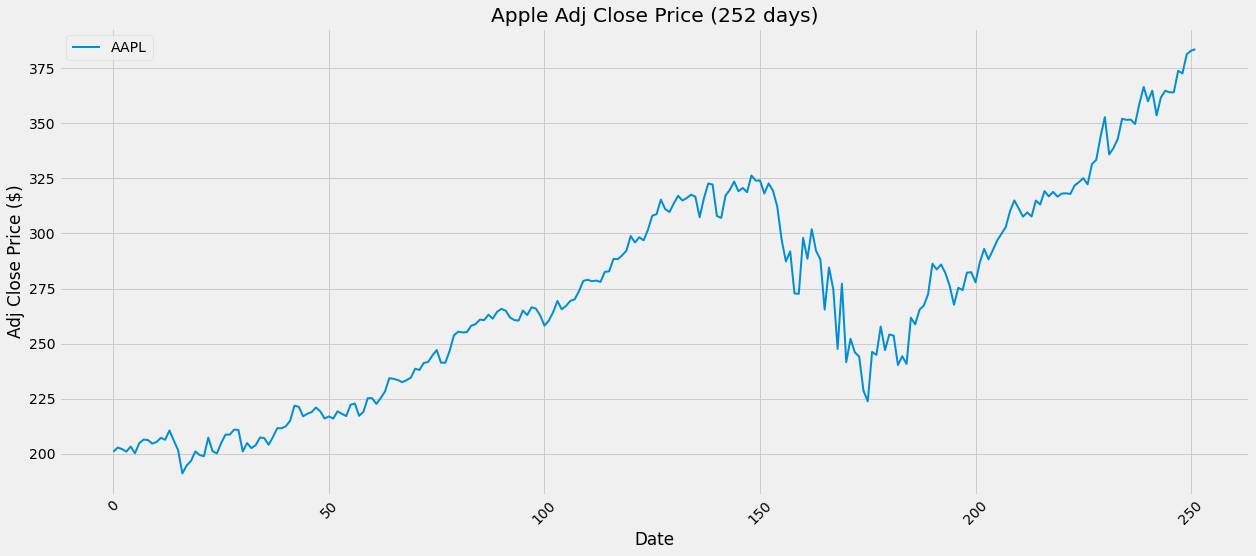

In [5]:
plt.figure(figsize=(19,8))
plt.plot(AAPL['Adj Close'],label='AAPL',linewidth=2)
plt.xticks(rotation=45)
plt.title('Apple Adj Close Price (252 days)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
SMA30=pd.DataFrame()
SMA30['Adj Close']=AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,343.324331
248,345.117663
249,347.272330
250,349.435664


In [7]:
SMA100=pd.DataFrame()
SMA100['Adj Close']=AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,300.372120
248,300.835854
249,301.409624
250,301.998997


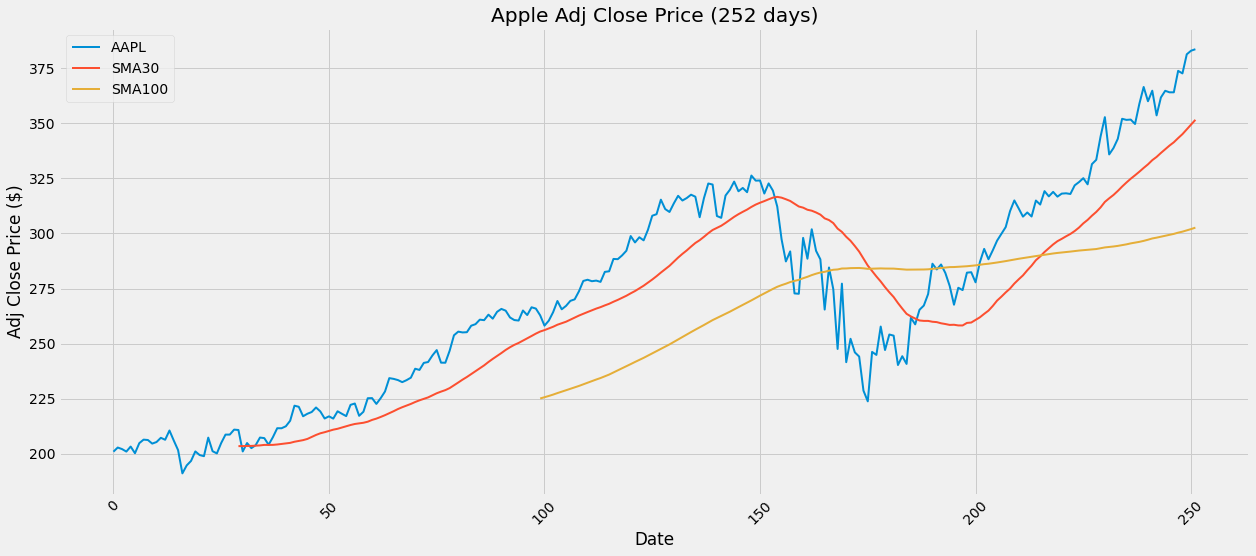

In [8]:
plt.figure(figsize=(19,8))
plt.plot(AAPL['Adj Close'],label='AAPL',linewidth=2)
plt.plot(SMA30['Adj Close'],label='SMA30',linewidth=2)
plt.plot(SMA100['Adj Close'],label='SMA100',linewidth=2)
plt.xticks(rotation=45)
plt.title('Apple Adj Close Price (252 days)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
data=pd.DataFrame()
data['AAPL']=AAPL['Adj Close']
data['SMA30']=SMA30['Adj Close']
data['SMA100']=SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,200.902344,NaN,NaN
1,202.789810,NaN,NaN
2,202.088181,NaN,NaN
3,200.951736,NaN,NaN
4,203.234497,NaN,NaN
...,...,...,...
247,373.850006,343.324331,300.372120
248,372.690002,345.117663,300.835854
249,381.369995,347.272330,301.409624
250,383.010010,349.435664,301.998997


In [10]:
def buy_sell(data):
    buy=[]
    sell=[]
    flag=-1

    for i in range(len(data)):
        if data['SMA30'][i]>data['SMA100'][i]:
            if flag!=1:
                buy.append(data['AAPL'][i])
                sell.append(np.nan)
                flag=1
            else:
                buy.append(np.nan)
                sell.append(np.nan)

        elif data['SMA30'][i]<data['SMA100'][i]:
            if flag!=0:
                buy.append(np.nan)
                sell.append(data['AAPL'][i])
                flag=0
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return (buy, sell)  

In [11]:
a=buy_sell(data)
data['Buy Signal Price']=a[0]
data['Sell Signal Price']=a[1]

In [12]:
data

,AAPL,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,200.902344,NaN,NaN,NaN,NaN
1,202.789810,NaN,NaN,NaN,NaN
2,202.088181,NaN,NaN,NaN,NaN
3,200.951736,NaN,NaN,NaN,NaN
4,203.234497,NaN,NaN,NaN,NaN
...,...,...,...,...,...
247,373.850006,343.324331,300.372120,NaN,NaN
248,372.690002,345.117663,300.835854,NaN,NaN
249,381.369995,347.272330,301.409624,NaN,NaN
250,383.010010,349.435664,301.998997,NaN,NaN


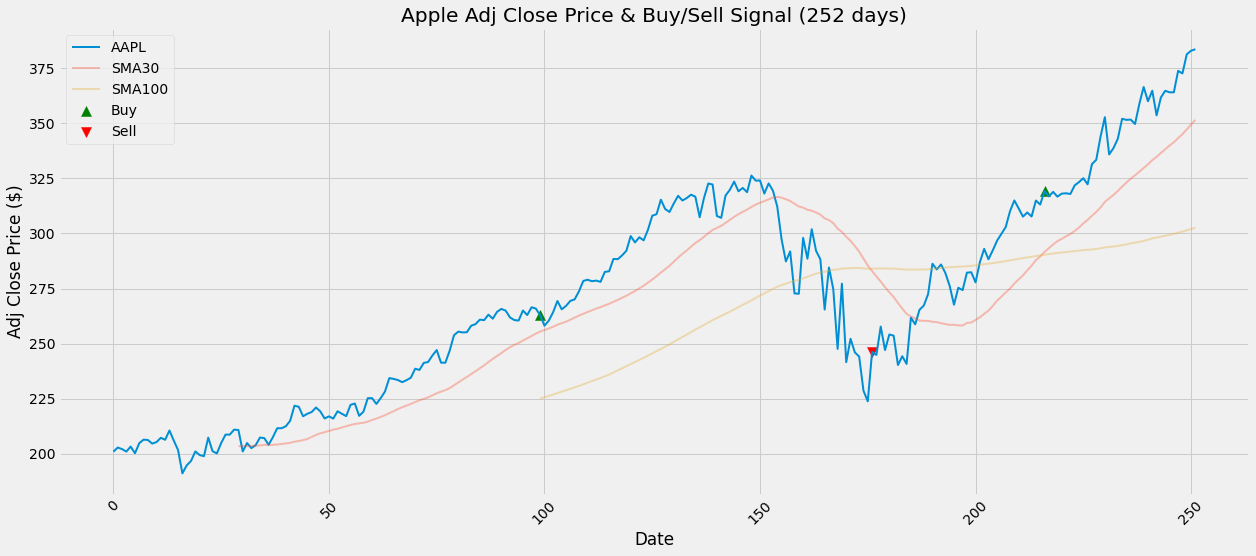

In [23]:
plt.figure(figsize=(19,8))
plt.plot(data['AAPL'],label='AAPL',linewidth=2, alpha=0.35)
plt.plot(data['SMA30'],label='SMA30',linewidth=2, alpha=0.35)
plt.plot(data['SMA100'],label='SMA100',linewidth=2, alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], s=100, label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell Signal Price'], s=100, label='Sell', marker='v', color='red')
plt.title('Apple Adj Close Price & Buy/Sell Signal (252 days)')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Adj Close Price ($)')
plt.legend(loc='upper left')
plt.show()